#Smart Fetal Health Predictor

###For Medical Device Companies & Healthcare Providers
________________________________________
❗ Problem Statement

Current fetal monitoring devices generate raw cardiotocography (CTG) data that requires expert interpretation by trained OB/GYN specialists. In many clinical settings — especially in underserved or remote regions — this dependency leads to delays in diagnosis, inconsistent interpretation, and missed early warnings of fetal distress.
________________________________________

💡 Proposed Solution

Develop and integrate an embedded AI-powered predictive model into fetal monitoring systems. This model will analyze real-time CTG data to automatically detect abnormal patterns and generate instant clinical alerts for fetal health risks.
________________________________________

🌍 Expected Impact:

•	⚡ Accelerates clinical response during emergencies.

•	🏥 Empowers frontline staff in areas with limited access to OB/GYN specialists.

•	📡 Enables remote monitoring & telemedicine.

•	🧸 Reduces fetal mortality and improves neonatal outcomes.

•	🚨 Supports timely medical decisions such as labor induction or emergency C-sections.

•	📊 Optimizes hospital resource allocation by triaging cases based on real-time risk detection




In [33]:
#  Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

#Data Preprocesing and EDA

In [34]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Fetal Health\fetal_health.csv')


In [35]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [36]:
data.shape

(2126, 22)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [38]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [39]:
data.duplicated().sum()

np.int64(13)

In [40]:
data = data.drop_duplicates()

data.shape

(2113, 22)

In [41]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [42]:
##value count for each columns
for col in data.columns:
  #print(col)
  print(data[col].value_counts())
  print()

baseline value
133.0    136
130.0    111
122.0    106
138.0    102
125.0     91
128.0     85
120.0     78
142.0     77
144.0     76
132.0     76
136.0     72
140.0     69
134.0     67
135.0     64
146.0     61
127.0     60
137.0     59
129.0     57
143.0     56
131.0     56
123.0     53
148.0     51
121.0     44
141.0     39
139.0     39
126.0     38
145.0     36
115.0     28
150.0     26
110.0     21
149.0     18
152.0     17
119.0     17
112.0     16
151.0     14
147.0     14
159.0     12
114.0     11
124.0     10
158.0     10
118.0      9
154.0      8
106.0      7
116.0      5
156.0      4
157.0      4
117.0      2
160.0      1
Name: count, dtype: int64

accelerations
0.000    886
0.003    159
0.002    159
0.001    143
0.004    117
0.006    112
0.005    109
0.008    103
0.007     90
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64

fetal_movement
0.000    1302
0.00

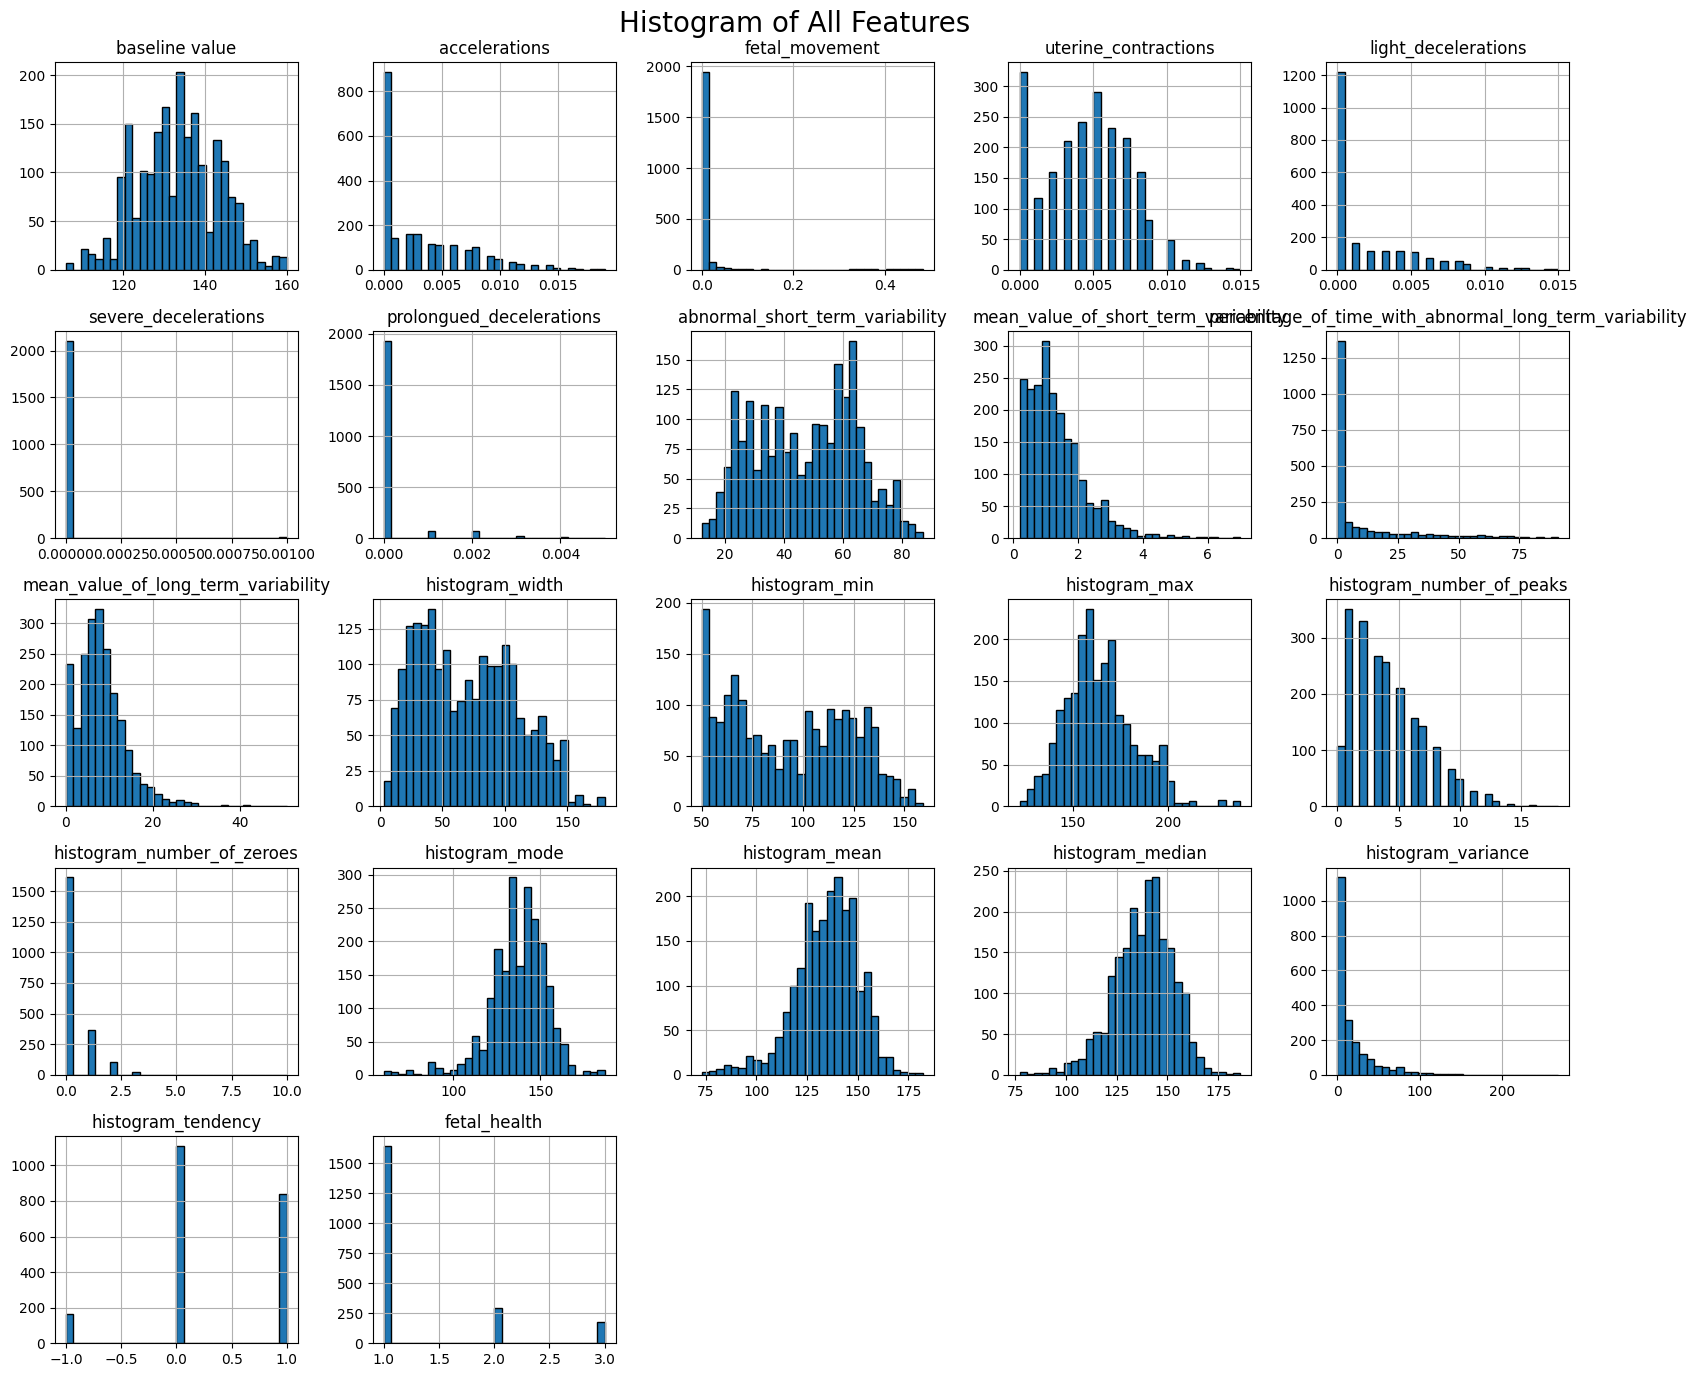

In [43]:
# Distribution of the columns
data.hist(figsize=(16, 14), bins=30, edgecolor='black')
plt.suptitle("Histogram of All Features", fontsize=20)
plt.tight_layout()
plt.show()

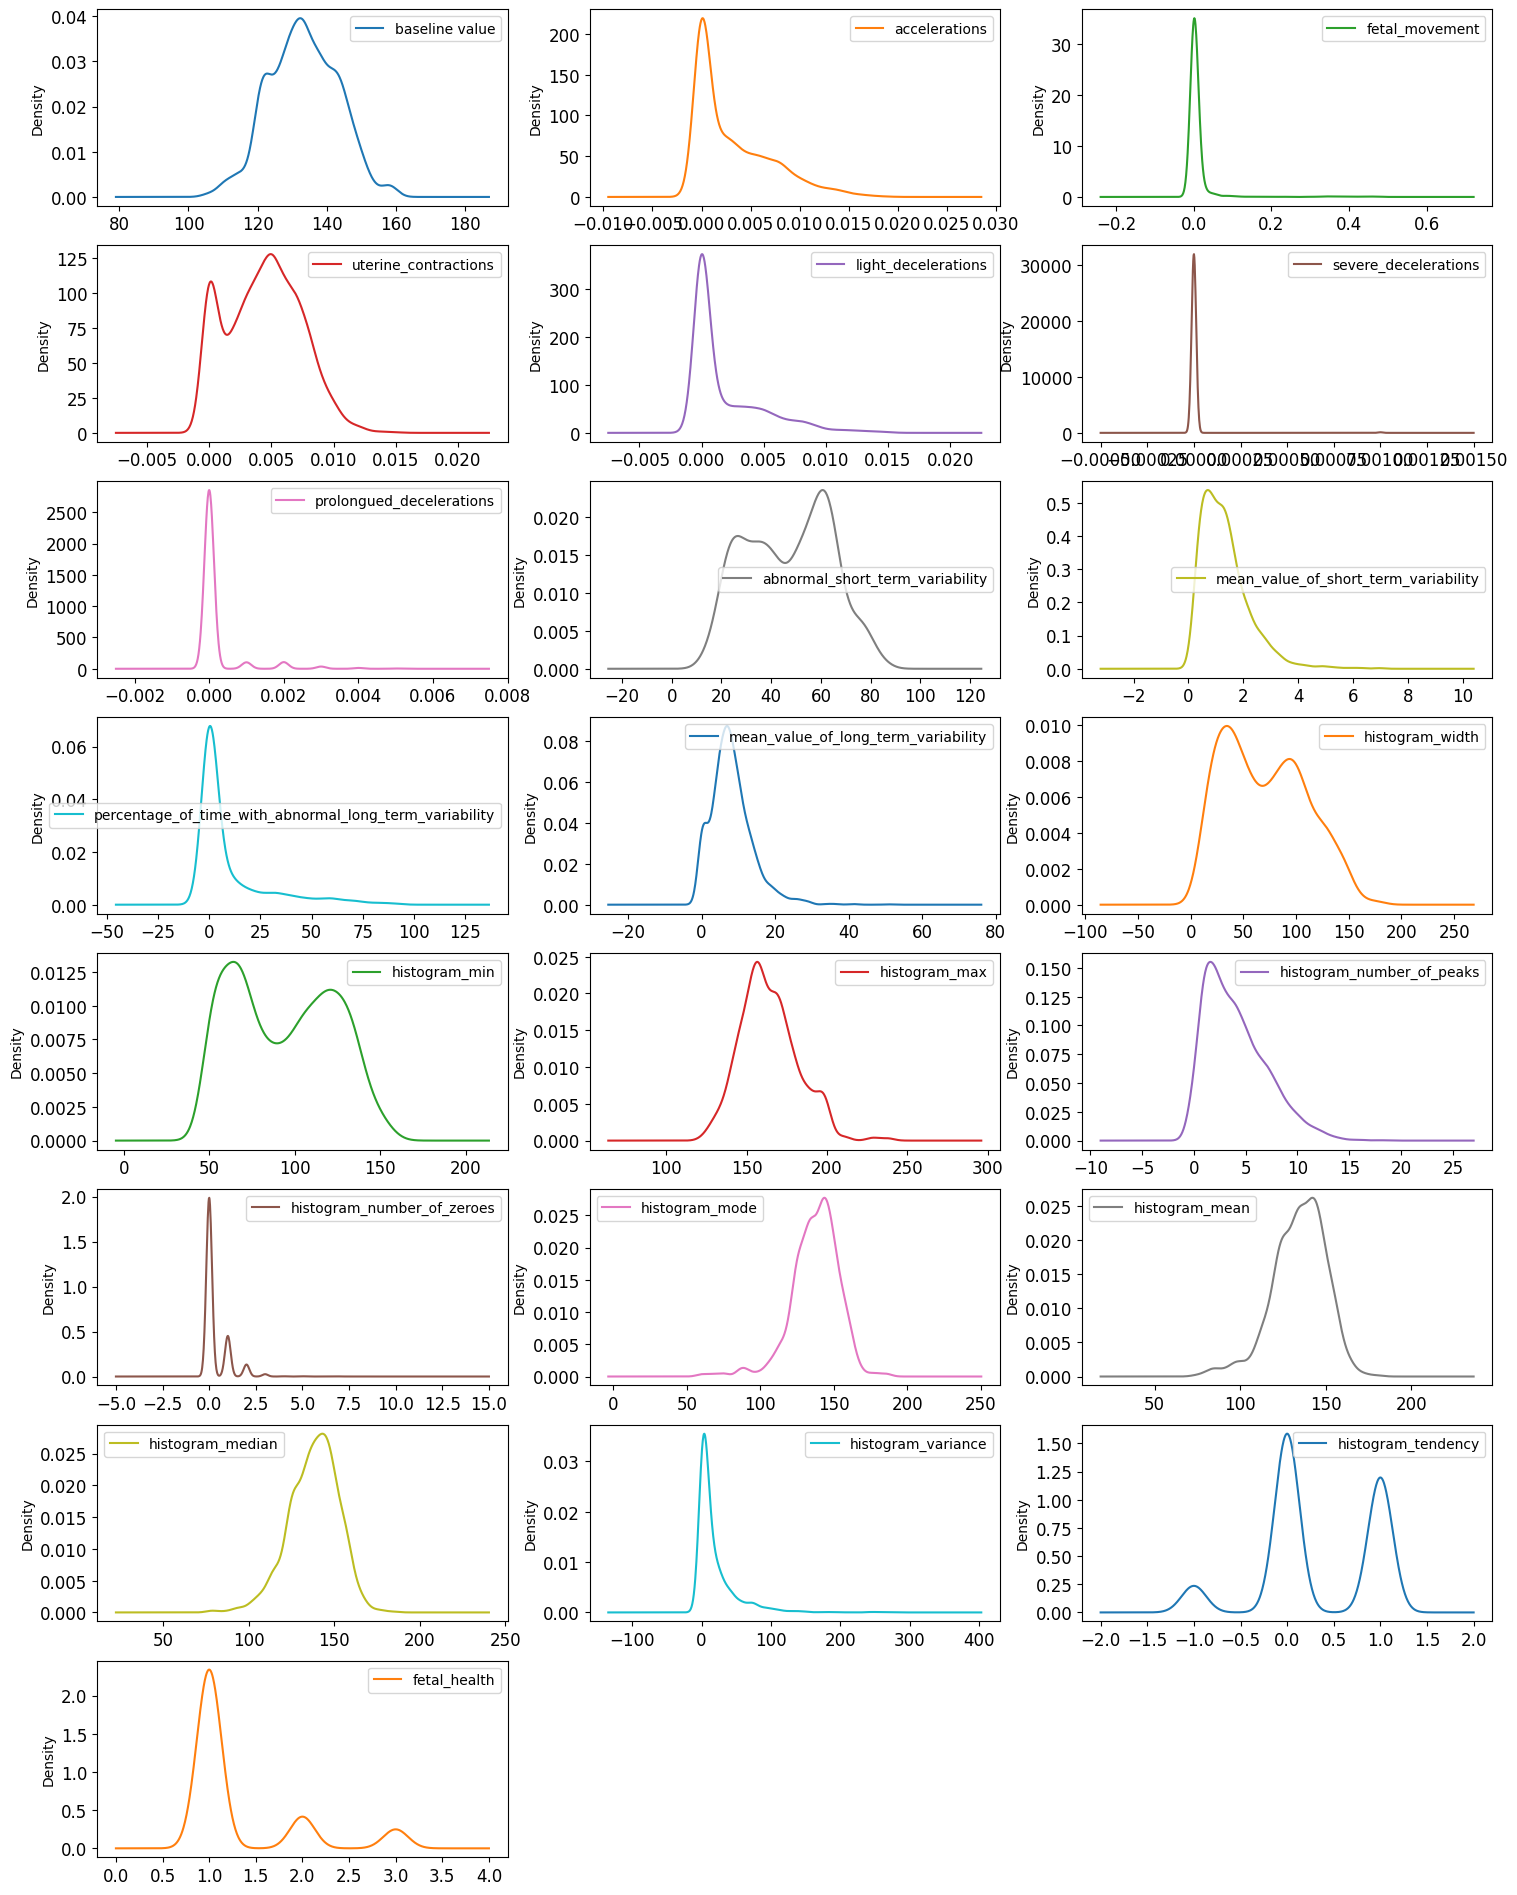

In [44]:
density_plot = data.plot(kind='density', subplots=True, layout=(8, 3), sharex=False,
                   sharey=False, fontsize=12, figsize=(18, 24))

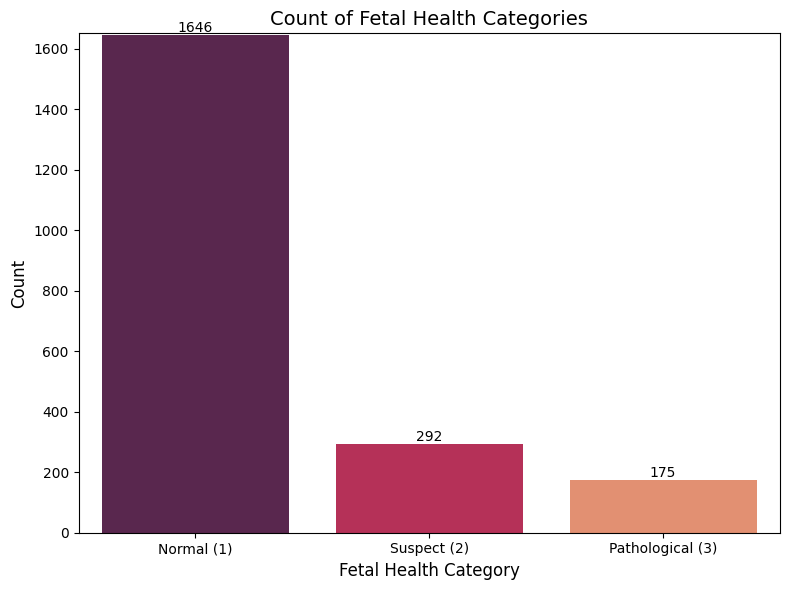

In [45]:
# Distribution of the target variable
# Count fetal health categories
fetal_health_counts = data['fetal_health'].value_counts().sort_index()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']

# Bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')

# Annotate bars
for i, count in enumerate(fetal_health_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Fetal Health Categories', fontsize=14)
plt.xlabel('Fetal Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(fetal_health_counts.values) + 5)
plt.tight_layout()
plt.show()


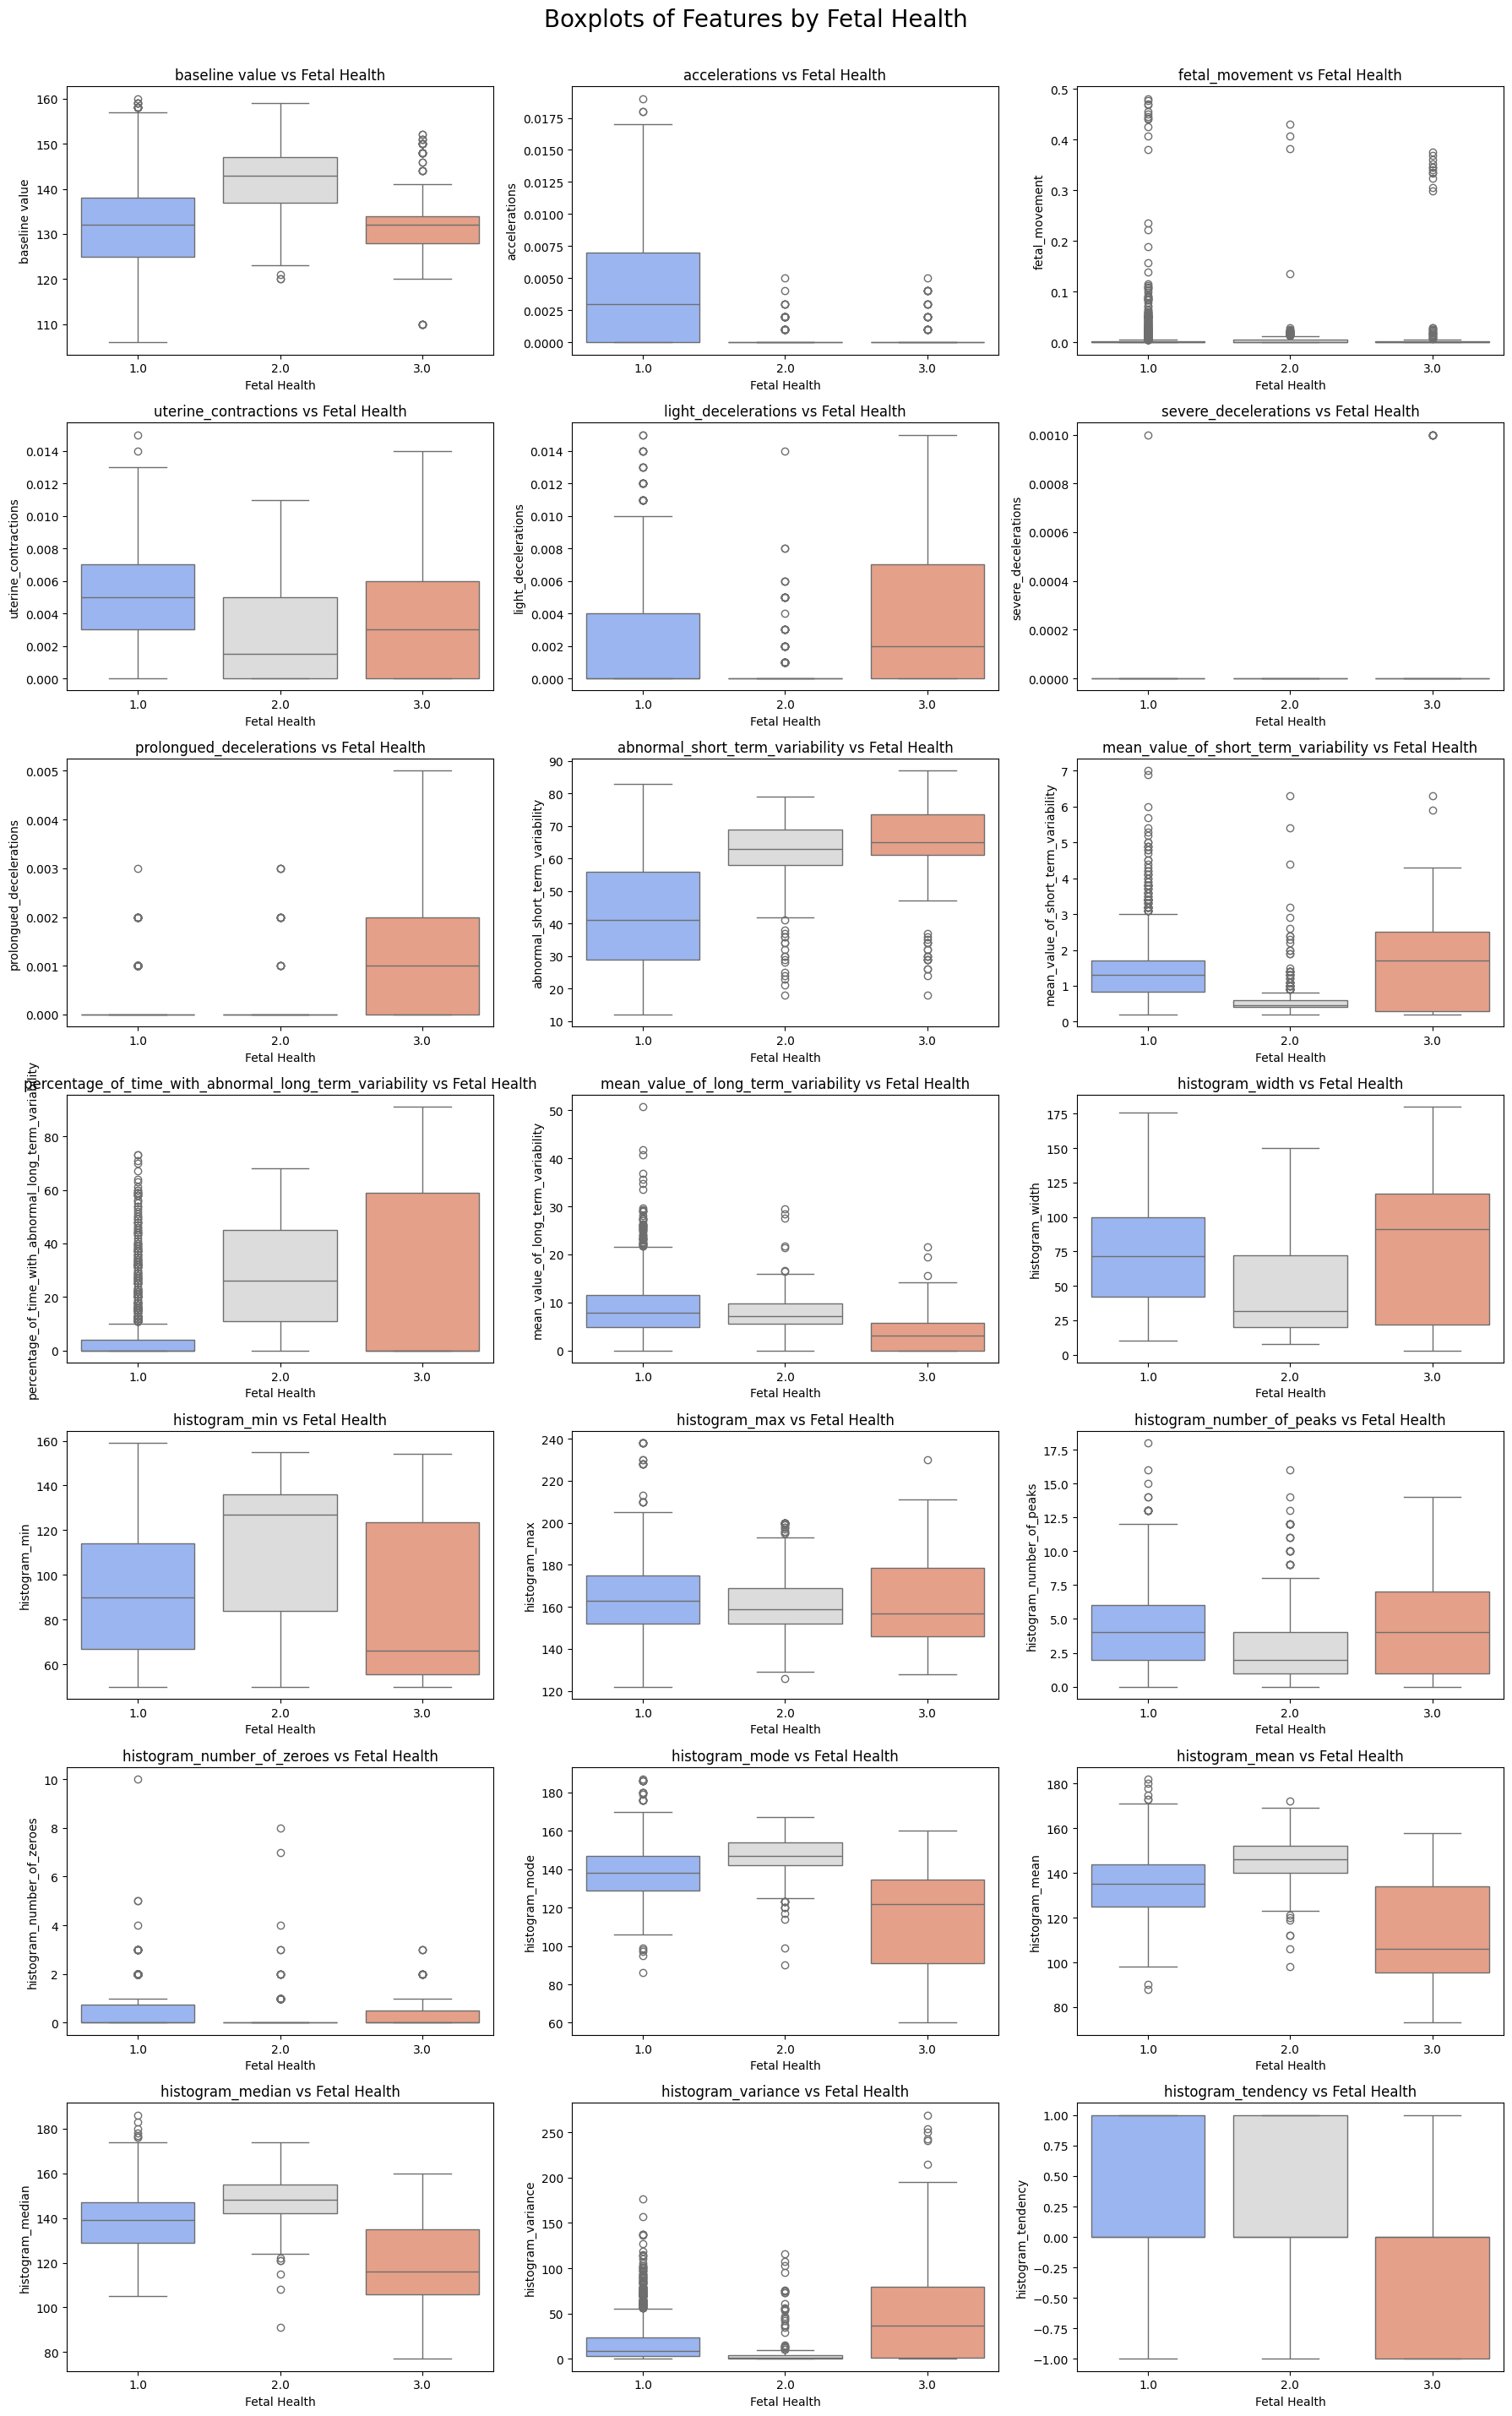

In [46]:
# Exclude the target column
features = [col for col in data.columns if col != 'fetal_health']

# Define subplot grid
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for idx, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x='fetal_health', y=feature, data=data, palette='coolwarm')
    plt.title(f'{feature} vs Fetal Health')
    plt.xlabel('Fetal Health')
    plt.ylabel(feature)
    plt.tight_layout()

plt.suptitle('Boxplots of Features by Fetal Health', fontsize=20, y=1.02)
plt.show()


This visualization is useful for understanding the distribution of each feature across the different fetal health categories and identifying potential relationships or differences that could be important for your machine learning model.

The outliers on the dataset are spotted. However, it is not quite a reasonable idea to remove them as it may lead to overfitting. Though we may end up with better statistics.

I didnt remove it because it is the outcome of a CTG report so it is unlikely that this was a data entry error.

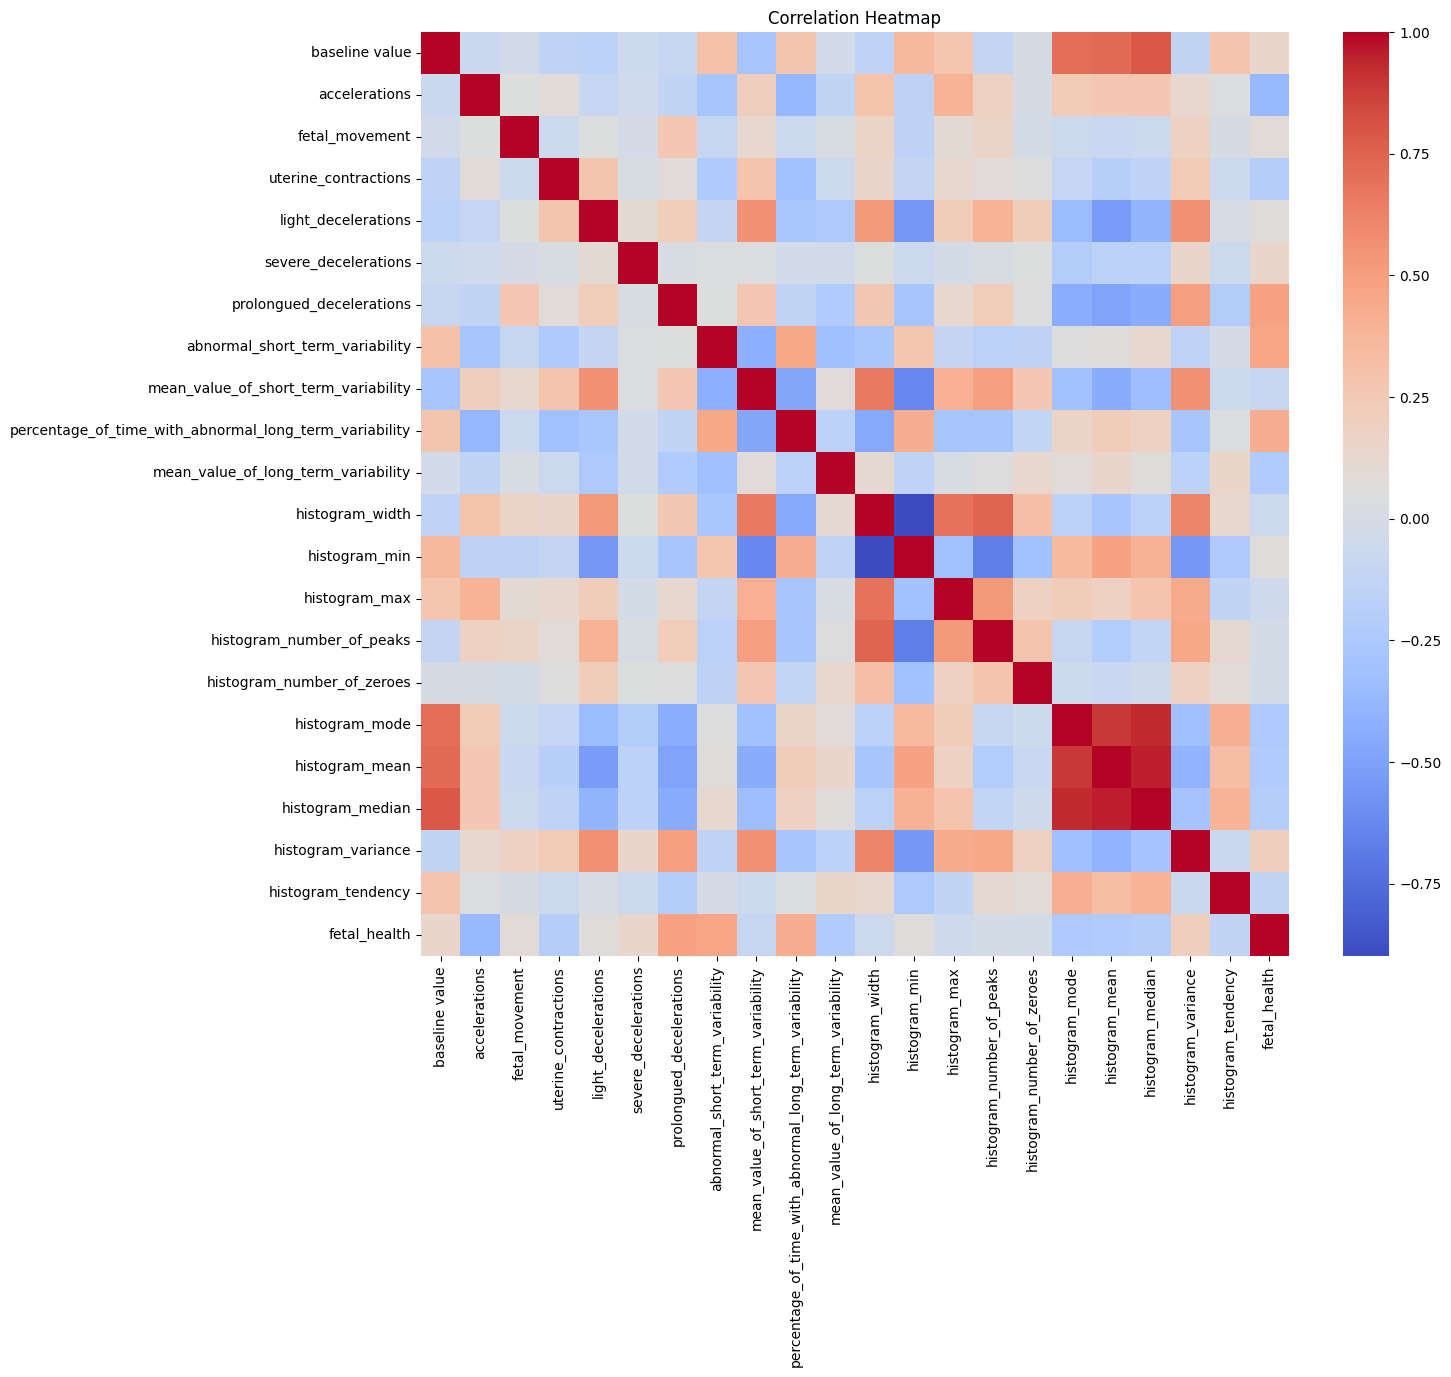

In [47]:
#Heatmap of Correlation
plt.figure(figsize=(14, 12))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


# Feature Importance & Modeling and Evaluation

* Feature Importance

* Logistic Regression

* XGBoost

* Random Forest

* SVM

* DecisionTree

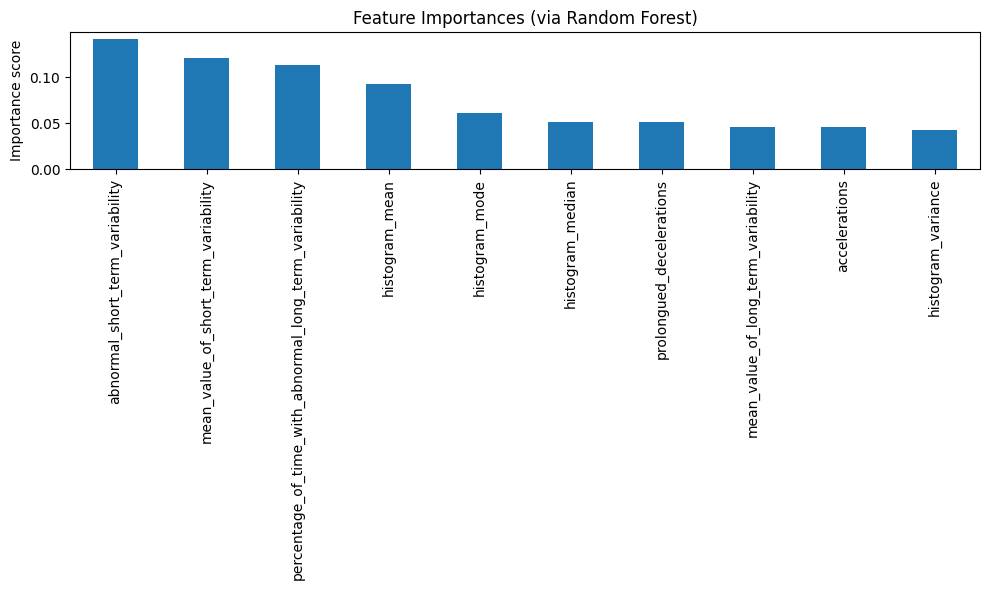

In [48]:

# Define features (X) and target (y)
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Fit a quick Random Forest for feature importances
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Compute importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances (via Random Forest)')
plt.ylabel('Importance score')
plt.tight_layout()
plt.show()


In [49]:
def train_and_evaluate(model, param_grid, X_train, X_test, y_train, y_test, model_name='Model'):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',  # Use accuracy for GridSearchCV
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    print(f"🔍 Best params for {model_name}: {search.best_params_}")

    # Calculate accuracies
    train_accuracy = best.score(X_train, y_train)
    test_accuracy = best.score(X_test, y_test)
    print(f"\n {model_name} Training Accuracy: {train_accuracy:.4f}")
    print(f"📊 {model_name} Test Accuracy: {test_accuracy:.4f}")

    # Classification Report on Test Set
    y_pred = best.predict(X_test)
    print(f"\n🧾 Classification Report for {model_name} (Test Set):\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 5))

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay.from_estimator(best, X_test, y_test, cmap='Blues', ax=plt.gca())
    plt.title(f'{model_name} Confusion Matrix (Test Set)')

    # ROC Curve (One-vs-Rest) on Test Set
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    if hasattr(best, "predict_proba"):
        y_score = best.predict_proba(X_test)
    else:
        y_score = best.decision_function(X_test)

    # Handle cases where y_score might be 1D for binary classification if needed
    if y_score.ndim == 1:
        y_score = np.vstack([1 - y_score, y_score]).T

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

    # Calculate macro average ROC AUC
    macro_roc_auc = roc_auc_score(y_test_bin, y_score, average='macro')
    print(f"📉 {model_name} Macro Average ROC AUC (OvR): {macro_roc_auc:.4f}")


    plt.subplot(1, 2, 2)
    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} ROC Curve (Test Set)')
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return best, train_accuracy, test_accuracy, macro_roc_auc

###Logistic Regression Training & Evaluation

Fitting 5 folds for each of 8 candidates, totalling 40 fits
🔍 Best params for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

 Logistic Regression Training Accuracy: 0.8740
📊 Logistic Regression Test Accuracy: 0.8511

🧾 Classification Report for Logistic Regression (Test Set):
               precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       330
         2.0       0.61      0.34      0.44        58
         3.0       0.71      0.69      0.70        35

    accuracy                           0.85       423
   macro avg       0.73      0.66      0.69       423
weighted avg       0.83      0.85      0.84       423

📉 Logistic Regression Macro Average ROC AUC (OvR): 0.9045


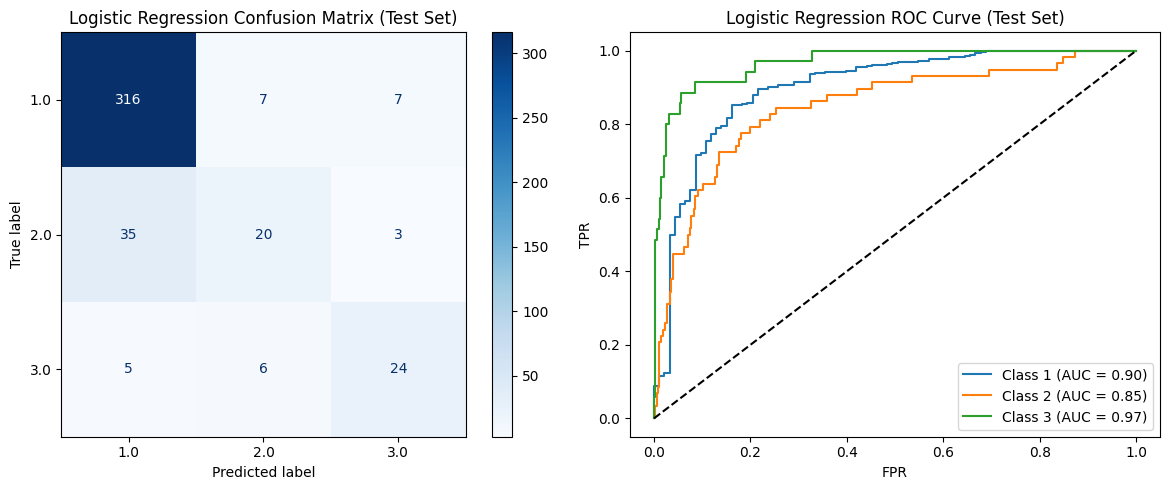

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define hyperparameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Run training and evaluation using the modeling template

best_logreg, train_acc_logreg, test_acc_logreg, roc_auc_logreg = train_and_evaluate(
    model=LogisticRegression(max_iter=1000),
    param_grid=param_grid_logreg,
    X_train=X_train[importances.index], # Use only the top 10 features
    X_test=X_test[importances.index],
    y_train=y_train,
    y_test=y_test,
    model_name='Logistic Regression'
)

###XGBoost — CV, Tuning, Evaluation

Fitting 5 folds for each of 72 candidates, totalling 360 fits
🔍 Best params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

 XGBoost Training Accuracy: 0.9988
📊 XGBoost Test Accuracy: 0.9433

🧾 Classification Report for XGBoost (Test Set):
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       330
         1.0       0.88      0.74      0.80        58
         2.0       0.97      0.91      0.94        35

    accuracy                           0.94       423
   macro avg       0.93      0.88      0.90       423
weighted avg       0.94      0.94      0.94       423

📉 XGBoost Macro Average ROC AUC (OvR): 0.9844


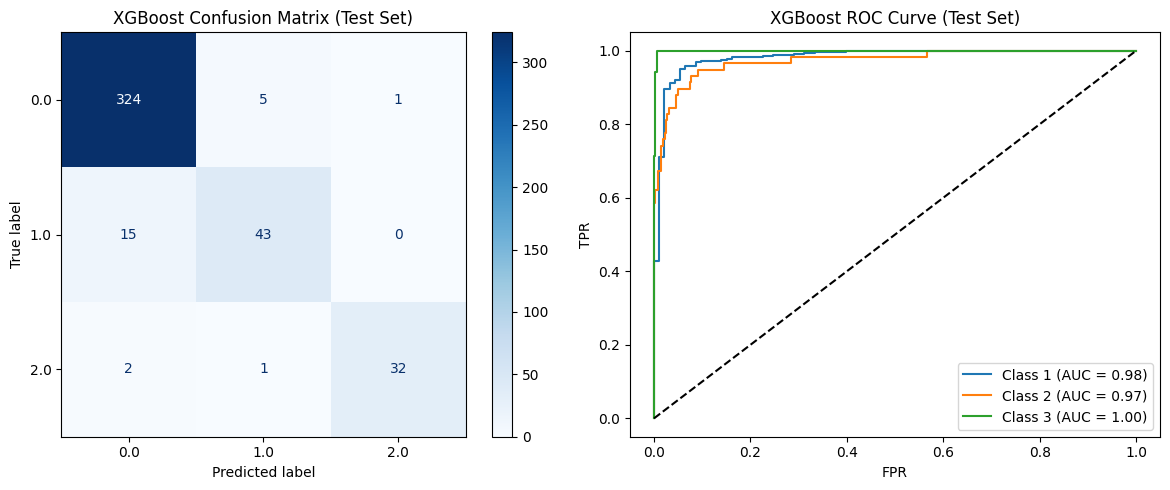

In [51]:
# Adjust target labels: 1 → 0, 2 → 1, 3 → 2 for XGBoost
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


# Run training and evaluation
best_xgb, train_acc_xgb, test_acc_xgb, roc_auc_xgb = train_and_evaluate(
    model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgb,
    X_train=X_train[importances.index], # Use only the top 10 features
    X_test=X_test[importances.index],
    y_train=y_train_xgb,
    y_test=y_test_xgb,
    model_name='XGBoost'
)

###Random Forest — CV, Tuning, Evaluation

Fitting 5 folds for each of 24 candidates, totalling 120 fits


🔍 Best params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

 Random Forest Training Accuracy: 0.9888
📊 Random Forest Test Accuracy: 0.9433

🧾 Classification Report for Random Forest (Test Set):
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       330
         2.0       0.88      0.72      0.79        58
         3.0       0.94      0.94      0.94        35

    accuracy                           0.94       423
   macro avg       0.92      0.88      0.90       423
weighted avg       0.94      0.94      0.94       423

📉 Random Forest Macro Average ROC AUC (OvR): 0.9833


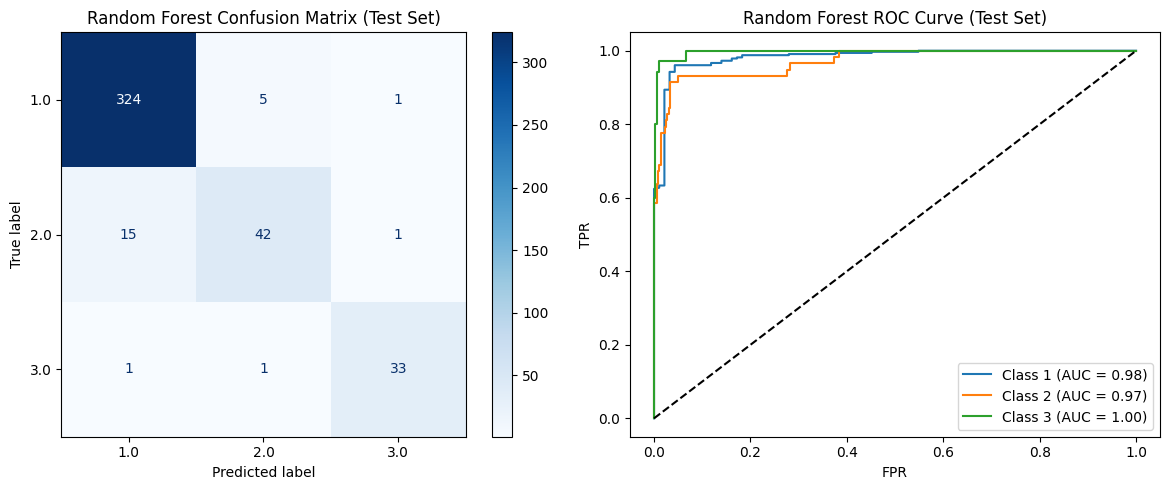

In [52]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Run training and evaluation
best_rf, train_acc_rf, test_acc_rf, roc_auc_rf = train_and_evaluate(
    model=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    X_train=X_train[importances.index], # Use only the top 10 features
    X_test=X_test[importances.index],
    y_train=y_train,
    y_test=y_test,
    model_name='Random Forest'
)

###SVM — CV, Tuning, Evaluation

Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Best params for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 Support Vector Machine Training Accuracy: 0.9473
📊 Support Vector Machine Test Accuracy: 0.9078

🧾 Classification Report for Support Vector Machine (Test Set):
               precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       330
         2.0       0.73      0.60      0.66        58
         3.0       0.94      0.89      0.91        35

    accuracy                           0.91       423
   macro avg       0.87      0.82      0.84       423
weighted avg       0.90      0.91      0.90       423

📉 Support Vector Machine Macro Average ROC AUC (OvR): 0.9711


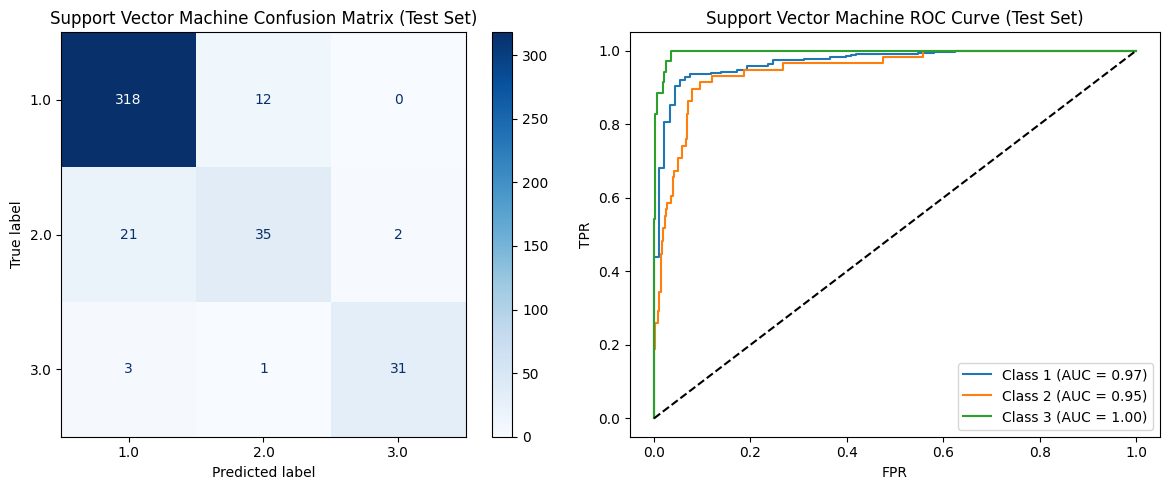

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[importances.index]) # Scale only the top 10 features
X_test_scaled = scaler.transform(X_test[importances.index])

# Define hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Run training and evaluation
best_svm, train_acc_svm, test_acc_svm, roc_auc_svm = train_and_evaluate(
    model=SVC(probability=True, random_state=42),
    param_grid=param_grid_svm,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    model_name='Support Vector Machine'
)

###Decision Tree — CV, Tuning, Evaluation

Fitting 5 folds for each of 72 candidates, totalling 360 fits
🔍 Best params for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

 Decision Tree Training Accuracy: 0.9355
📊 Decision Tree Test Accuracy: 0.9220

🧾 Classification Report for Decision Tree (Test Set):
               precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       330
         2.0       0.88      0.62      0.73        58
         3.0       0.91      0.89      0.90        35

    accuracy                           0.92       423
   macro avg       0.91      0.83      0.86       423
weighted avg       0.92      0.92      0.92       423

📉 Decision Tree Macro Average ROC AUC (OvR): 0.9315


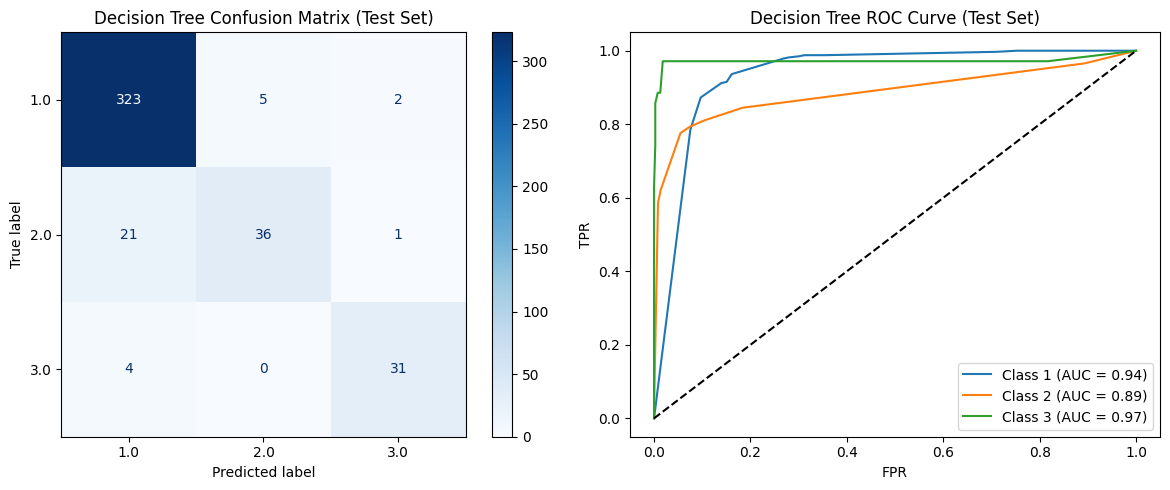

In [54]:
# Hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train & Evaluate
best_dt, train_acc_dt, test_acc_dt, roc_auc_dt = train_and_evaluate(
    model=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    X_train=X_train[importances.index], # Use only the top 10 features
    X_test=X_test[importances.index],
    y_train=y_train,
    y_test=y_test,
    model_name='Decision Tree'
)

## Model scores


Display a summary of the training, testing, and ROC AUC scores for all models, potentially in a table format.


In [55]:
# Create a DataFrame to hold the performance metrics
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'Support Vector Machine', 'Decision Tree'],
    'Training Accuracy': [train_acc_logreg, train_acc_xgb, train_acc_rf, train_acc_svm, train_acc_dt],
    'Test Accuracy': [test_acc_logreg, test_acc_xgb, test_acc_rf, test_acc_svm, test_acc_dt],
    'ROC AUC (OvR)': [roc_auc_logreg, roc_auc_xgb, roc_auc_rf, roc_auc_svm, roc_auc_dt]
})

# Display the performance summary
display(performance_summary)

,Model,Training Accuracy,Test Accuracy,ROC AUC (OvR)
0,Logistic Regression,0.873964,0.851064,0.904509
1,XGBoost,0.998817,0.943262,0.984392
2,Random Forest,0.988757,0.943262,0.983265
3,Support Vector Machine,0.947337,0.907801,0.971075
4,Decision Tree,0.935503,0.921986,0.931519


#Summary:

### Data Analysis Key Findings

*   The `train_and_evaluate` function was updated to calculate and return training accuracy, test accuracy, and macro average ROC AUC score for a given model and data split.
*   All models (Logistic Regression, XGBoost, Random Forest, Support Vector Machine, and Decision Tree) were trained and evaluated using only the top 10 features based on feature importance.
*   The training accuracy, test accuracy, and ROC AUC scores for each trained model were successfully captured and displayed in a summary table.


##Model Validation

* XGBoost has near-perfect train accuracy (0.999) → suspicious of overfitting.

* Random Forest offers a sweet spot: excellent test accuracy (0.943) and high AUC (0.983) with more realistic train accuracy.

* SVM and DT are solid, but lower test metrics.

* Logistic Regression is far behind.



##Metric	Value

###Model Used	Random Forest
* Random Forest is the most balanced and robust:
* High generalization (Test Accuracy)
* High ROC AUC (0.983)
* Training Accuracy: 0.98%
* Test Accuracy: 94.3%
* Overall Accuracy	94%
* All classes are well-separated and accurately predicted
* trong on the rare and critical Class 3 (Pathological)
* Avoids overfitting (Train ≠ 1.0)



Dataset: Public CTG dataset (2113 samples, 22 features).

Training: GridSearchCV with 5-fold stratified cross-validation.

Features Used:

['abnormal_short_term_variability','mean_value_of_short_term_variability',
'percentage_of_time_with_abnormal_long_term_variability',  'histogram_mean', 'histogram_mode','histogram_median', 'prolongued_decelerations',   'mean_value_of_long_term_variability','accelerations',  'histogram_variance']

Deployment Readiness: Model exported in .pkl format and integrated into a real-time Streamlit interface for testing.

Overfitting assessment: Random Forest shows excellent test set performance, with high accuracy and F1-scores across all classes.

This suggests good generalization. The same caveat applies: without training performance, the results point to a robust model, not one that is clearly overfitting based on the its output information.



In [56]:
import joblib

In [57]:
# Save the trained Random Forest model using joblib
joblib.dump(best_rf, 'random_forest_model.pkl')

print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl
